Install dependencies

In [1]:
!pip3 install torch torchvision torchaudio
!pip3 install matplotlib
!pip3 install ultralytics roboflow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import torch
from ultralytics import YOLO
from pathlib import Path
import os
import json
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:

device = "cuda:0" if torch.cuda.is_available() else "cpu"

print(f"Using device: {device} ({'GPU' if device != 'cpu' else 'CPU'})")


Using device: cuda:0 (GPU)


In [ ]:

CONFIG = {
    'model': 'yolo11m.pt',  # Choose model size: n, s, m, l, x
    'data': 'datasets/safety-nohat/data.yaml',  
    'epochs': 35,
    'batch': 2 if device != 'cpu' else 4,  # Adjust batch 
    'imgsz': 640,
    'patience': 5,
    'device': device, 
}
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"


In [5]:

save_dir = Path('runs/detect')
save_dir.mkdir(parents=True, exist_ok=True)

this_path = os.getcwd()

os.environ['ULTRALYTICS_CONFIG_DIR'] = this_path

data_file = f'{this_path}/{CONFIG['data']}'
with open(data_file, 'r') as f:
    data = yaml.safe_load(f)
    

data['train'] = f'{this_path}/{CONFIG['data'].rsplit('/', 1)[0]}/train/images'
data['val'] = f'{this_path}/{CONFIG['data'].rsplit('/', 1)[0]}/valid/images'
data['test'] = f'{this_path}/{CONFIG['data'].rsplit('/', 1)[0]}/test/images'

with open(data_file, 'w') as f:
    yaml.safe_dump(data, f)


In [6]:

model = YOLO(CONFIG['model'])

In [7]:

results = model.train(
    data=CONFIG['data'],
    epochs=CONFIG['epochs'],
    batch=CONFIG['batch'],
    imgsz=CONFIG['imgsz'],
    patience=CONFIG['patience'],
    device=CONFIG['device'],
    
    verbose=True,
    
    optimizer='SGD',
    lr0=0.001,
    lrf=0.01,
    momentum=0.9,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_bias_lr=0.01,
    warmup_momentum=0.8,
    amp=False,
    
    # Augmentations
    augment=True,
    hsv_h=0.015,  # Image HSV-Hue augmentationc
    hsv_s=0.7,   # Image HSV-Saturation augmentation
    hsv_v=0.4,   # Image HSV-Value augmentation
    degrees=10,  # Image rotation (+/- deg)
    translate=0.1,  # Image translation (+/- fraction)
    scale=0.3,   # Image scale (+/- gain)
    shear=0.0,   # Image shear (+/- deg)
    perspective=0.0,  # Image perspective
    flipud=0.1,  # Image flip up-down
    fliplr=0.1,  # Image flip left-right
    mosaic=1.0,  # Image mosaic
    mixup=0.0,   # Image mixup
    
)


Ultralytics 8.3.35 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 3721MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=datasets/safety-nohat/data.yaml, epochs=35, time=None, patience=20, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

train: Scanning /var/home/larizmen/DATA/REPOS/ai-apps/dev/safety-hat/datasets/safety-nohat/train/labels... 6838 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6838/6838 [00:07<00:00, 910.18it/s] 


train: New cache created: /var/home/larizmen/DATA/REPOS/ai-apps/dev/safety-hat/datasets/safety-nohat/train/labels.cache


val: Scanning /var/home/larizmen/DATA/REPOS/ai-apps/dev/safety-hat/datasets/safety-nohat/valid/labels... 1960 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1960/1960 [00:02<00:00, 869.99it/s]


val: New cache created: /var/home/larizmen/DATA/REPOS/ai-apps/dev/safety-hat/datasets/safety-nohat/valid/labels.cache
Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train11
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35      2.47G      2.335      4.809      1.942          4        640: 100%|██████████| 3419/3419 [34:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:33<00:00,  3.19it/s]


                   all       1960       4078      0.653      0.537      0.554      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35       2.5G      1.815      2.094      1.547          2        640: 100%|██████████| 3419/3419 [33:40<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:34<00:00,  3.17it/s]


                   all       1960       4078      0.795      0.718      0.794      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      2.49G      1.709      1.562      1.475          7        640: 100%|██████████| 3419/3419 [32:49<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:20<00:00,  3.48it/s]

                   all       1960       4078      0.793      0.786       0.84      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35      2.48G      1.675      1.324      1.402          9        640: 100%|██████████| 3419/3419 [32:47<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:38<00:00,  3.09it/s]

                   all       1960       4078      0.809      0.842      0.884      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      2.48G      1.618      1.187      1.353          8        640: 100%|██████████| 3419/3419 [34:34<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:28<00:00,  3.30it/s]

                   all       1960       4078      0.859      0.863      0.916      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35      2.48G      1.585      1.095      1.334          3        640: 100%|██████████| 3419/3419 [34:54<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:27<00:00,  3.33it/s]

                   all       1960       4078      0.849      0.868      0.922      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35      2.48G      1.571      1.025      1.318          5        640: 100%|██████████| 3419/3419 [33:00<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:25<00:00,  3.37it/s]

                   all       1960       4078      0.867      0.874      0.929      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      2.48G      1.535      0.996      1.295          2        640: 100%|██████████| 3419/3419 [33:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:27<00:00,  3.33it/s]

                   all       1960       4078       0.87      0.889       0.94       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35      2.48G      1.525     0.9768      1.298          5        640: 100%|██████████| 3419/3419 [33:03<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:22<00:00,  3.44it/s]

                   all       1960       4078       0.86      0.902      0.939      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35      2.48G      1.506     0.9218      1.282          7        640: 100%|██████████| 3419/3419 [32:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:17<00:00,  3.55it/s]

                   all       1960       4078      0.864      0.911      0.948      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35      2.48G      1.514     0.9052      1.281          9        640: 100%|██████████| 3419/3419 [32:29<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:15<00:00,  3.62it/s]

                   all       1960       4078      0.875      0.893      0.947      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35      2.48G      1.491     0.8806      1.271          5        640: 100%|██████████| 3419/3419 [32:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:15<00:00,  3.61it/s]

                   all       1960       4078      0.895      0.894      0.951      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      2.48G      1.484     0.8642       1.26          6        640: 100%|██████████| 3419/3419 [32:10<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:15<00:00,  3.61it/s]

                   all       1960       4078      0.878      0.919      0.952      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35      2.48G      1.451     0.8482      1.248          2        640: 100%|██████████| 3419/3419 [32:10<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:15<00:00,  3.62it/s]

                   all       1960       4078      0.883      0.915      0.953      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35      2.48G      1.452     0.8363      1.254         19        640: 100%|██████████| 3419/3419 [32:11<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:15<00:00,  3.63it/s]

                   all       1960       4078      0.889      0.898       0.95      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35      2.48G      1.444     0.8304       1.25          6        640: 100%|██████████| 3419/3419 [32:08<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:15<00:00,  3.62it/s]

                   all       1960       4078      0.908      0.898      0.957      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35      2.48G      1.437      0.812      1.242          5        640: 100%|██████████| 3419/3419 [32:13<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:15<00:00,  3.61it/s]

                   all       1960       4078      0.897      0.909      0.956      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      2.48G      1.421     0.8031      1.232          2        640: 100%|██████████| 3419/3419 [32:11<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:15<00:00,  3.62it/s]

                   all       1960       4078      0.889      0.923      0.954      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35      2.48G      1.419     0.8034      1.228          7        640: 100%|██████████| 3419/3419 [32:05<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:15<00:00,  3.63it/s]

                   all       1960       4078       0.89      0.921      0.956      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      2.48G      1.401     0.7794      1.222          4        640: 100%|██████████| 3419/3419 [32:04<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:14<00:00,  3.63it/s]

                   all       1960       4078      0.868      0.934      0.958      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35      2.48G      1.398     0.7729      1.221          2        640: 100%|██████████| 3419/3419 [32:00<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:14<00:00,  3.63it/s]

                   all       1960       4078      0.905      0.907      0.959      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      2.48G      1.382     0.7558      1.213          4        640: 100%|██████████| 3419/3419 [32:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:14<00:00,  3.63it/s]

                   all       1960       4078      0.894      0.925      0.959      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35      2.48G      1.386     0.7494       1.21          6        640: 100%|██████████| 3419/3419 [32:03<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:14<00:00,  3.64it/s]

                   all       1960       4078      0.907      0.917       0.96        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35      2.48G      1.377     0.7522      1.205          4        640: 100%|██████████| 3419/3419 [31:59<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:14<00:00,  3.64it/s]

                   all       1960       4078      0.901       0.92       0.96      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35      2.48G      1.366      0.738      1.201          2        640: 100%|██████████| 3419/3419 [31:56<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:14<00:00,  3.63it/s]

                   all       1960       4078      0.911      0.911      0.958        0.6


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35      2.31G      1.332     0.6157      1.193          4        640: 100%|██████████| 3419/3419 [31:54<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:14<00:00,  3.64it/s]

                   all       1960       4078      0.906      0.919      0.958      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35      2.31G      1.329     0.6093      1.186          2        640: 100%|██████████| 3419/3419 [31:53<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:14<00:00,  3.64it/s]

                   all       1960       4078      0.913        0.9       0.96      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35      2.31G      1.321     0.6035      1.188          7        640: 100%|██████████| 3419/3419 [31:54<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:14<00:00,  3.65it/s]

                   all       1960       4078      0.913      0.908      0.958      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35      2.31G      1.311      0.594      1.178          6        640: 100%|██████████| 3419/3419 [31:55<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:14<00:00,  3.64it/s]

                   all       1960       4078      0.904      0.917       0.96      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35      2.31G      1.298     0.5831      1.174          5        640: 100%|██████████| 3419/3419 [31:54<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:14<00:00,  3.64it/s]

                   all       1960       4078      0.893      0.927       0.96      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35      2.31G      1.293     0.5852      1.176          3        640: 100%|██████████| 3419/3419 [31:51<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:14<00:00,  3.64it/s]

                   all       1960       4078      0.913      0.903      0.959      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35      2.31G      1.284     0.5805      1.172          2        640: 100%|██████████| 3419/3419 [31:51<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:14<00:00,  3.64it/s]

                   all       1960       4078      0.895      0.919      0.958      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35      2.31G      1.275     0.5729      1.169          3        640: 100%|██████████| 3419/3419 [31:49<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:14<00:00,  3.65it/s]

                   all       1960       4078      0.901      0.915      0.958      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35      2.48G      1.271     0.5717      1.168          2        640: 100%|██████████| 3419/3419 [31:52<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:14<00:00,  3.63it/s]

                   all       1960       4078      0.909      0.912      0.959      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35      2.31G      1.271     0.5713      1.163          3        640: 100%|██████████| 3419/3419 [31:54<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [02:14<00:00,  3.64it/s]

                   all       1960       4078      0.908      0.906      0.959      0.609



35 epochs completed in 20.288 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 40.5MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics 8.3.35 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 3721MiB)
YOLO11m summary (fused): 303 layers, 20,037,742 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 490/490 [04:44<00:00,  1.72it/s]


                   all       1960       4078      0.906      0.904      0.957      0.598
                 glove        354        766      0.917      0.825      0.939      0.488
               goggles        606        666      0.887      0.935      0.972      0.589
                helmet        194        264      0.899      0.992      0.976      0.611
                  mask         52         52      0.968      0.942      0.979      0.681
              no_glove        484       1093      0.898      0.757      0.897      0.447
            no_goggles        557        717      0.893      0.858      0.953      0.571
             no_helmet        166        209       0.93        0.9      0.963      0.556
               no_mask        103        103      0.903      0.961      0.987      0.635
              no_shoes         50         89      0.886      0.978      0.957      0.711
                 shoes         65        119      0.876      0.889      0.944      0.692
Speed: 0.4ms preproce

In [ ]:

file_path = f"{str(results.save_dir)}"  
results_csv_path = f"{file_path}/results.csv"  

All expected metrics are present.


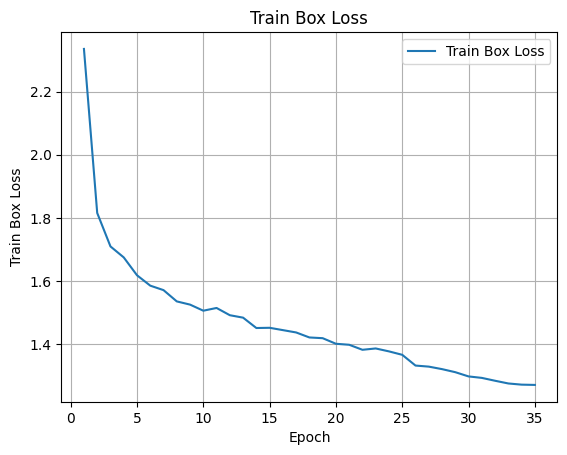

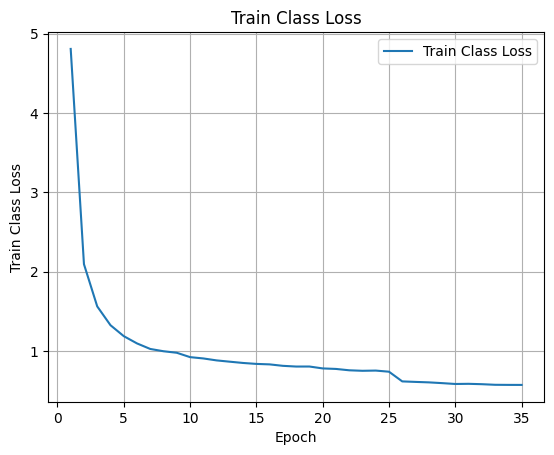

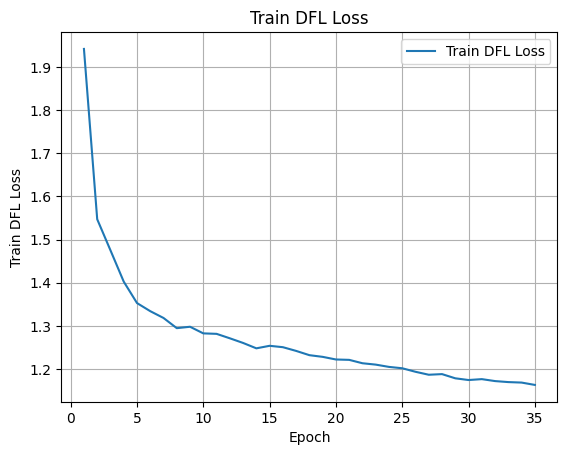

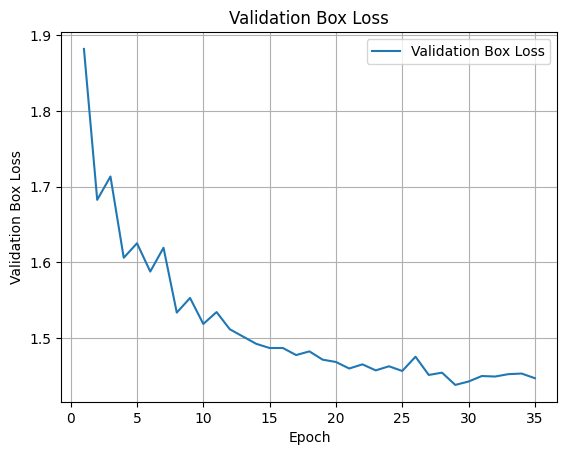

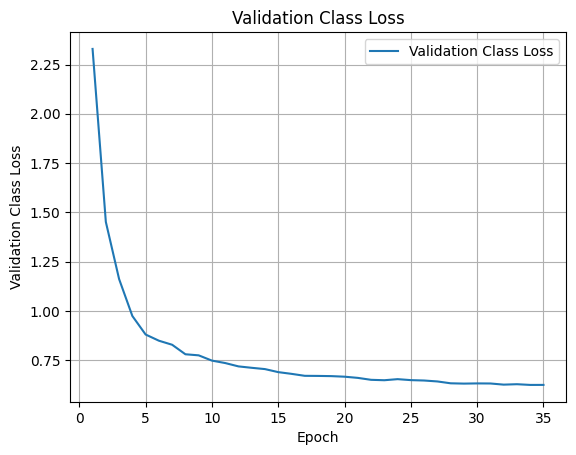

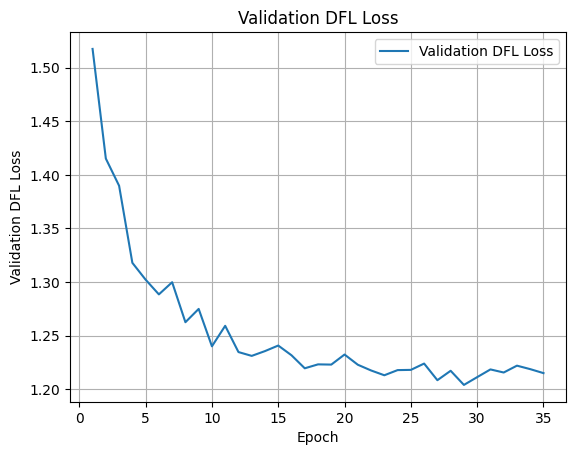

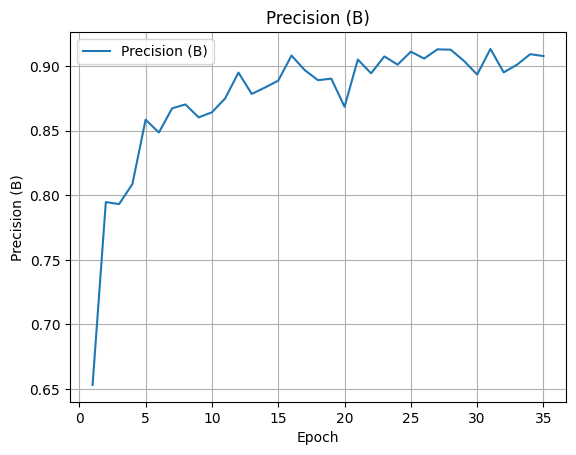

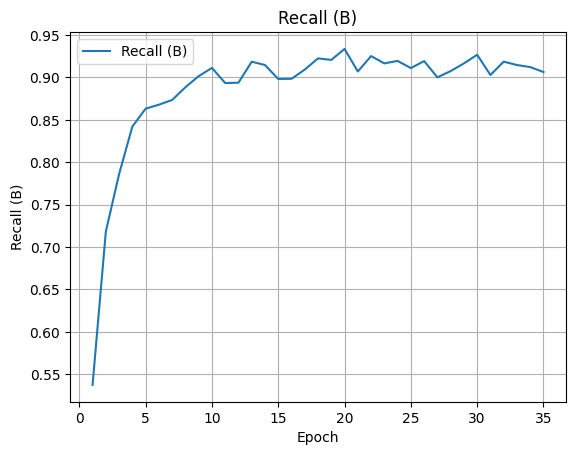

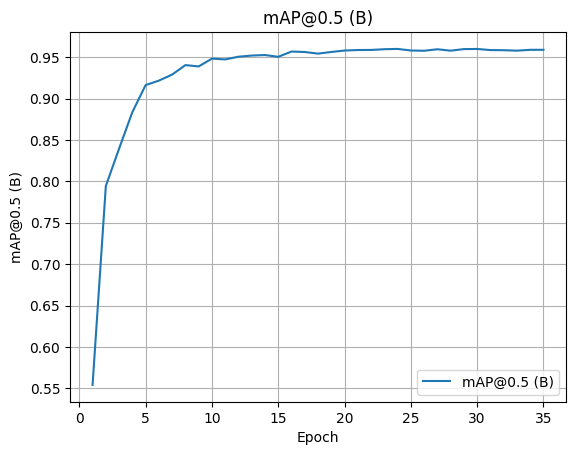

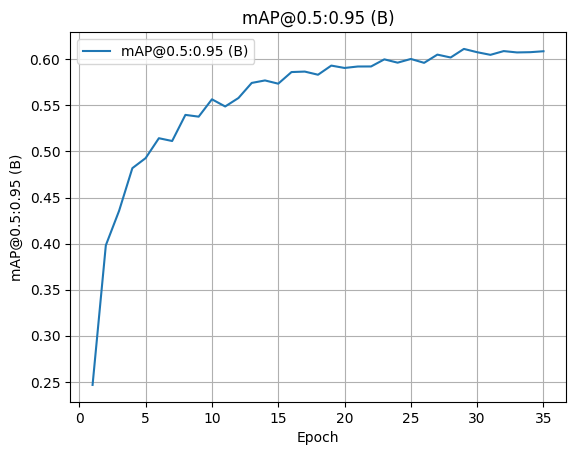


Final Metrics Summary (Last Epoch):
Train Box Loss: 1.2706
Train Class Loss: 0.5713
Train DFL Loss: 1.1628
Validation Box Loss: 1.4470
Validation Class Loss: 0.6245
Validation DFL Loss: 1.2151
Precision (B): 0.9078
Recall (B): 0.9064
mAP@0.5 (B): 0.9589
mAP@0.5:0.95 (B): 0.6088

Improvement Trends:
Train Box Loss: improved (Initial: 2.3354, Final: 1.2706)
Train Class Loss: improved (Initial: 4.8088, Final: 0.5713)
Train DFL Loss: improved (Initial: 1.9424, Final: 1.1628)
Validation Box Loss: improved (Initial: 1.8818, Final: 1.4470)
Validation Class Loss: improved (Initial: 2.3291, Final: 0.6245)
Validation DFL Loss: improved (Initial: 1.5175, Final: 1.2151)
Precision (B): worsened (Initial: 0.6532, Final: 0.9078)
Recall (B): worsened (Initial: 0.5375, Final: 0.9064)
mAP@0.5 (B): worsened (Initial: 0.5541, Final: 0.9589)
mAP@0.5:0.95 (B): worsened (Initial: 0.2467, Final: 0.6088)


In [ ]:

try:
    result_metrics = pd.read_csv(results_csv_path)
except FileNotFoundError:
    print(f"File not found: {results_csv_path}")
    exit()


metrics = {
    "Train Box Loss": "train/box_loss",
    "Train Class Loss": "train/cls_loss",
    "Train DFL Loss": "train/dfl_loss",
    "Validation Box Loss": "val/box_loss",
    "Validation Class Loss": "val/cls_loss",
    "Validation DFL Loss": "val/dfl_loss",
    "Precision (B)": "metrics/precision(B)",
    "Recall (B)": "metrics/recall(B)",
    "mAP@0.5 (B)": "metrics/mAP50(B)",
    "mAP@0.5:0.95 (B)": "metrics/mAP50-95(B)",
}

%matplotlib inline

available_metrics = {name: col for name, col in metrics.items() if col in result_metrics.columns}
missing_metrics = [name for name in metrics if name not in available_metrics]

if missing_metrics:
    print(f"Missing metrics: {', '.join(missing_metrics)}")
else:
    print("All expected metrics are present.")

for metric_name, col in available_metrics.items():
    plt.figure()
    plt.plot(result_metrics["epoch"], result_metrics[col], label=metric_name)
    plt.title(metric_name)
    plt.xlabel("Epoch")
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid()
    plt.show()

final_epoch = result_metrics.iloc[-1]
final_metrics = {name: final_epoch[col] for name, col in available_metrics.items()}

print("\nFinal Metrics Summary (Last Epoch):")
for name, value in final_metrics.items():
    print(f"{name}: {value:.4f}")

print("\nImprovement Trends:")
for metric_name, col in available_metrics.items():
    initial = result_metrics[col].iloc[0]
    final = result_metrics[col].iloc[-1]
    trend = "improved" if final < initial else "worsened"
    print(f"{metric_name}: {trend} (Initial: {initial:.4f}, Final: {final:.4f})")


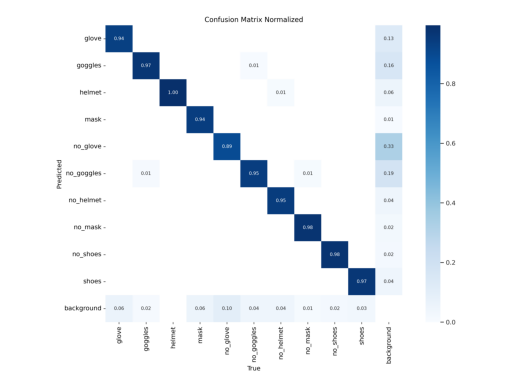

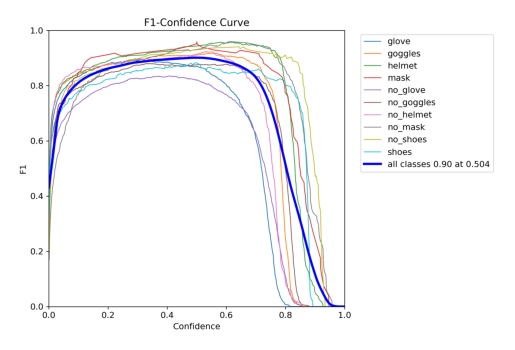

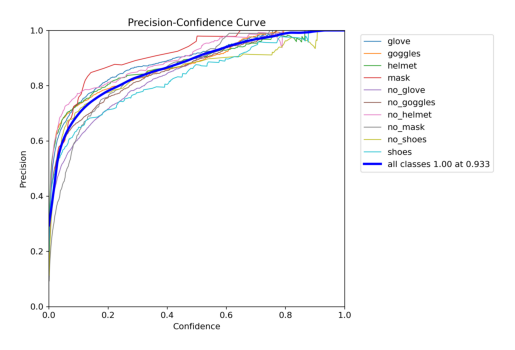

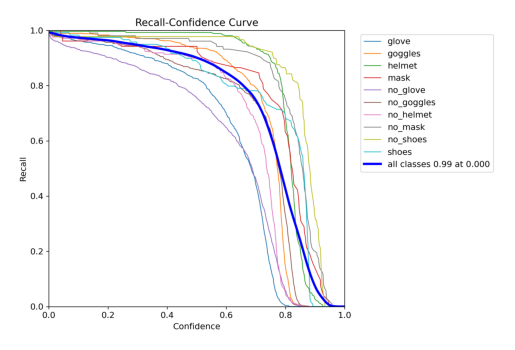

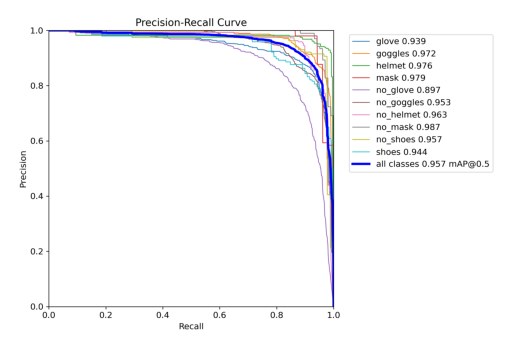

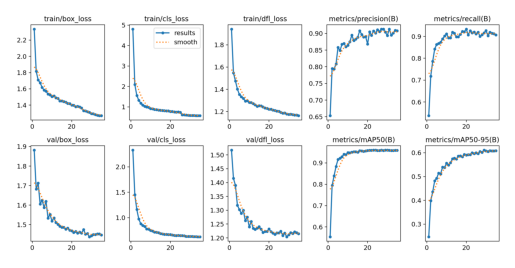

In [10]:


img = mpimg.imread(f"{file_path}/confusion_matrix_normalized.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/F1_curve.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/P_curve.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/R_curve.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/PR_curve.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/results.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

